<a href="https://colab.research.google.com/github/majavk/Data_Science_Portfolio/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA for HandWritten digit dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Udemy_ML/DATA/'
filename = 'digits.csv'
raw_data = pd.read_csv(path + filename)
df = raw_data.copy()

In [ ]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
pixels = df.drop('number_label',axis=1)

###Display of an image

In [ ]:
single_image = pixels.iloc[0]

In [ ]:
single_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [ ]:
#converting pd.series to np.array
single_image.to_numpy()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
single_image.to_numpy().shape

(64,)

In [ ]:
number = single_image.to_numpy().reshape(8,8)
number

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

###Image representation of an (8,8) array

In [ ]:
%matplotlib inline

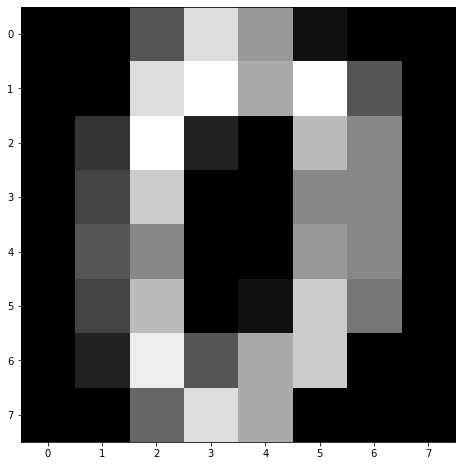

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(number,cmap='gray')



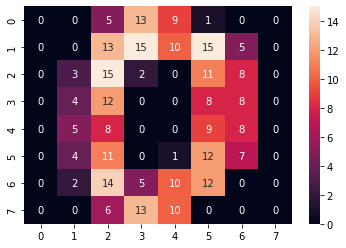

In [ ]:
sns.heatmap(number,annot=True)

###Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_pixels = scaler.fit_transform(pixels)

In [ ]:
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

##PCA 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_model = PCA(n_components=2)

In [ ]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

#####how much variance is explained?

In [ ]:
#variance explained by the components
pca_model.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [ ]:
#variance explained in total
np.sum(pca_model.explained_variance_ratio_)

0.2159497049624423

#### Scatterplot of numbers in 2 features

In [ ]:
pca_pixels

array([[ 1.91421136, -0.95453352],
       [ 0.58897917,  0.92467402],
       [ 1.30205781, -0.31726992],
       ...,
       [ 1.02258019, -0.14789775],
       [ 1.07604511, -0.38087108],
       [-1.25772347, -2.22758576]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


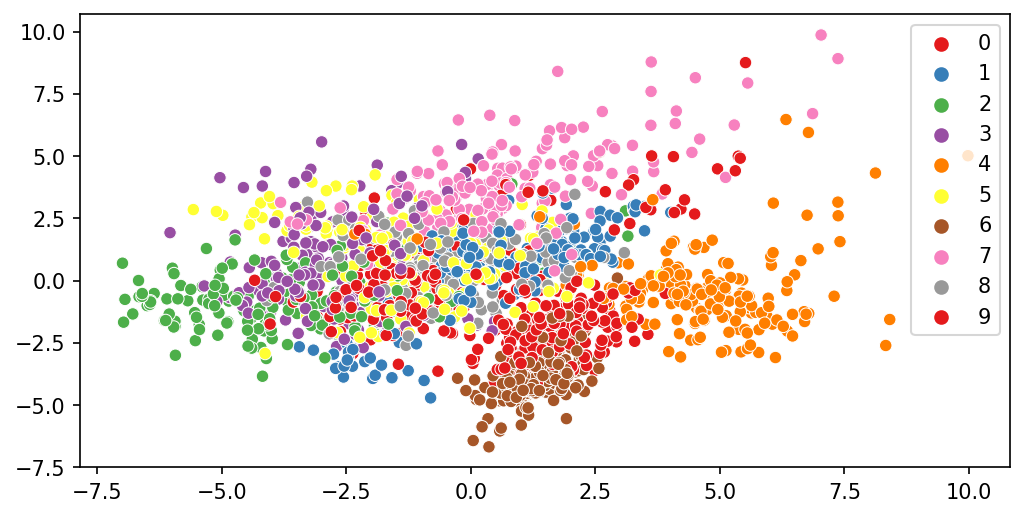

In [ ]:
#scatterplot of first principal component against second one
plt.figure(figsize=(8,4),dpi=150)
sns.scatterplot(pca_pixels[:,0],pca_pixels[:,1],hue=df.number_label.values,
                palette='Set1')

###3D interactive plot of PCA

In [ ]:
pca_model = PCA(n_components=3)


In [ ]:
pca_pixels_3 = pca_model.fit_transform(scaled_pixels)

In [ ]:
from mpl_toolkits import mplot3d

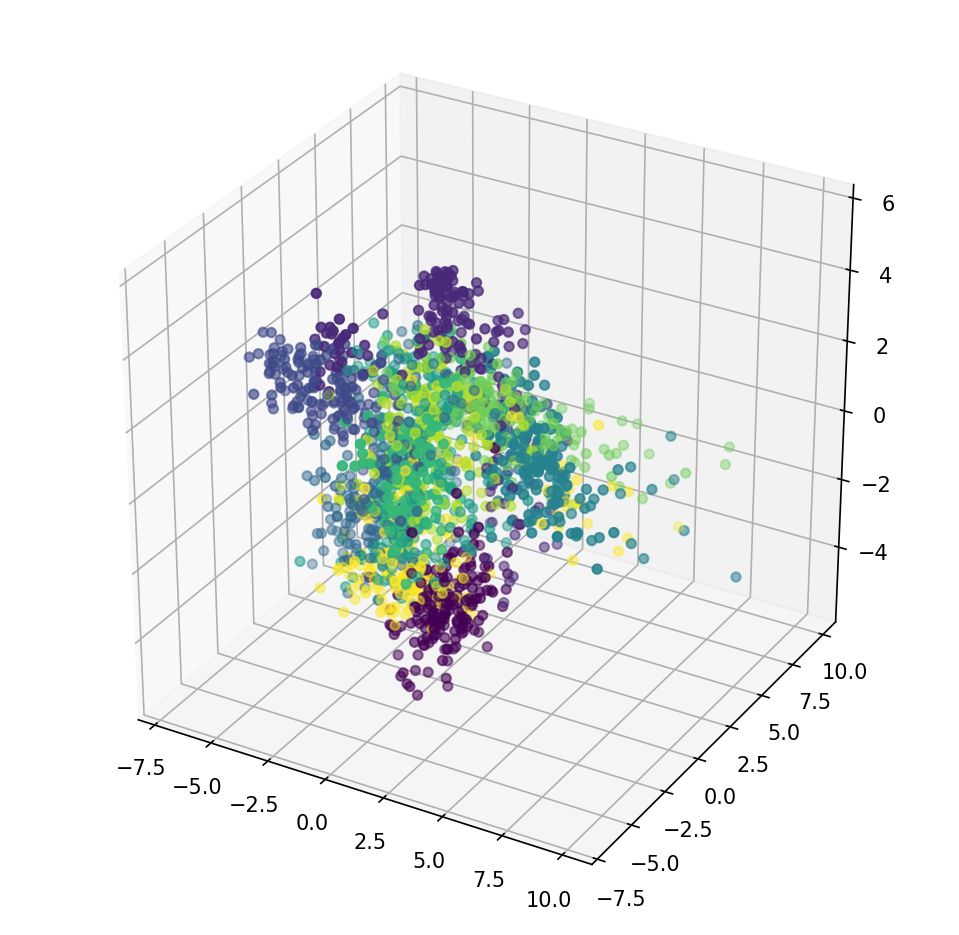

In [ ]:
plt.figure(figsize=(8,8),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels_3[:,0],pca_pixels_3[:,1],pca_pixels_3[:,2],c=df['number_label'].values)
